<img src="fireblaze.jpg" width=250 height=200 />

## <p style="font-family: Arial; font-size:1.4em;color:red; style='background :yellow'"> Assignment</p>


### The Problem Statement
* **Built a classifier to predict whether it will rain or not in the future in Australia.**

<span style='color:Red'> **About The Dataset** </span>

This dataset contains about 10 years of daily weather observations from many locations across Australia.
* **Date:** The date of observation.

* **Location:** The common name of the location of the weather station, Ex:- Canberra, Sydney.

* **MinTemp:** The minimum temperature in degrees celsius.

* **MaxTemp:** The maximum temperature in degrees celsius.

* **Rainfall:** The amount of rainfall recorded for the day in mm

* **Evaporation:** The so-called Class A pan evaporation (mm) in the 24 hours to 9am.

* **Sunshine:** The number of hours of bright sunshine in the day.

* **WindGustDir:** The direction of the strongest wind gust in the 24 hours to midnight.

* **WindGustSpeed:** The speed (km/h) of the strongest wind gust in the 24 hours to midnight.

* **WindDir9am:** Direction of the wind at 9am




<span style='color:Blue'> **Import the Required Libraries** </span>

In [1]:
#import pandas 
import pandas as pd

#import numpy
import numpy as np

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

<span style='color:Blue'> **Question - 1. Review the dataset and display the first Ten Rows.** </span>

In [4]:
#read the CSV file

dataset = pd.read_csv('weatherAUS.csv')

#print top three rows
dataset.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


## 1. Exploratory data analysis

<span style='color:Blue'> **Question - 2. Display the size and summary of the dataset.** </span>

In [5]:
dataset.shape

(145460, 23)

In [6]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

📌 We have 145460 rows and 23 columns in our dataset.


📌 We can see that the dataset contains mixture of categorical and numerical variables.


📌 Also, there are some missing values in the dataset. Let's check it out.

In [7]:
dataset.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


<span style='color:Blue'> **Question - 3. Segregate the data on the basis of categorical and numerical columns.** </span>

In [9]:
#for categorical 
categorical = [i for i in dataset.columns if dataset[i].dtype=='object']
categorical

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [10]:
#for numerical
numerical = [i for i in dataset.columns if dataset[i].dtype=='float64']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

<span style='color:Blue'> **Question - 4.Are there any missing values in the categorical feature?** </span>

In [11]:
dataset[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

<span style='color:Blue'> **Question - 5.What is the percentage of Missing Values in the dataset? and Display it in descending order.** </span>

In [15]:
dataset.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [18]:
(dataset.isnull().sum() / len(dataset) * 100).sort_values(ascending=False)

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
Temp9am           1.214767
WindSpeed9am      1.214767
MinTemp           1.020899
MaxTemp           0.866905
Location          0.000000
Date              0.000000
dtype: float64

## 2. Feature Engineering 

<span style='color:Blue'> **Question - 6. Check the datatypes, and convert date column into DateTime. Then split it into Day, Month, and Year columns.** </span>

In [19]:
dataset.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [13]:
# parse the dates, currently coded as strings, into datetime format

dataset['Date'] = pd.to_datetime(dataset['Date'])

In [14]:
# extract year from date

dataset['Year'] = dataset['Date'].dt.year

dataset['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [15]:
# extract month from date

dataset['Month'] = dataset['Date'].dt.month

dataset['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [16]:
# extract day from date

dataset['Day'] = dataset['Date'].dt.day

dataset['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [17]:
dataset['Month'] = dataset['Date'].dt.month
dataset.Month

0         12
1         12
2         12
3         12
4         12
          ..
145455     6
145456     6
145457     6
145458     6
145459     6
Name: Month, Length: 145460, dtype: int64

In [18]:
dataset['Year'] = dataset['Date'].dt.year
dataset.Year

0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
145455    2017
145456    2017
145457    2017
145458    2017
145459    2017
Name: Year, Length: 145460, dtype: int64

In [19]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


<span style='color:Blue'> **Question - 7. Check the column which has no missing value, then compare count of classes of that column.** </span>

NOTE:- Also calculate the total number of unique values.

In [20]:
a = dataset.isnull().sum()
a[a==0]

Date        0
Location    0
dtype: int64

In [22]:
dataset['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [23]:
dataset.Location.nunique()

49

In [22]:
dataset.Location.value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Hobart              3193
Perth               3193
Adelaide            3193
Albury              3040
Bendigo             3040
Wollongong          3040
Launceston          3040
MountGinini         3040
Cairns              3040
GoldCoast           3040
Ballarat            3040
Townsville          3040
AliceSprings        3040
Albany              3040
MountGambier        3040
Tuggeranong         3039
Newcastle           3039
Penrith             3039
Portland            3009
Nuriootpa           3009
Mildura             3009
Cobar               3009
Moree               3009
Witchcliffe         3009
Woomera             3009
SydneyAirport       3009
Dartmoor            3009
CoffsHarbour        3009
Watsonia            3009
PerthAirport        3009
MelbourneAirport    3009
NorfolkIsland       3009
Sale                3009
PearceRAAF          3009
Richmond            3009


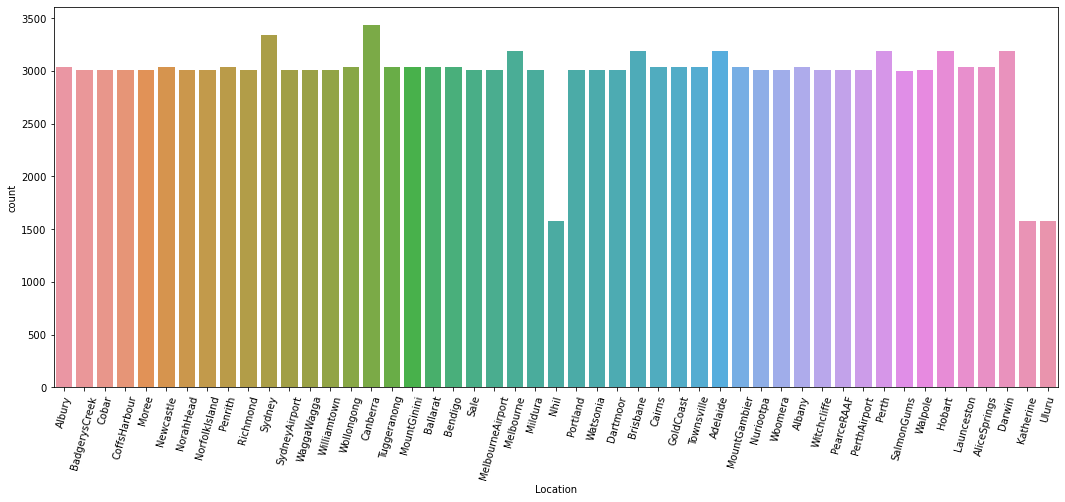

In [32]:
plt.figure(figsize=(18,7))
sns.countplot(data=dataset, x="Location")
plt.xticks(rotation=75)
plt.show()

<span style='color:Blue'> **Question - 8. Find out the number of unique values in the WindGustDir variable.** </span>

NOTE:- Finding out count of those unique classes.

In [37]:
# check labels in WindGustDir variable

dataset.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [38]:
dataset.WindGustDir.value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

<span style='color:Blue'> **Question - 9. Replacing the missing values with the most frequent values.(from WindGustDir)** </span>

NOTE:- Find out all uniques values for categorical features and also do visualize for all. 

In [39]:
dataset['WindGustDir'].fillna(dataset['WindGustDir'].mode()[0], inplace=True)

In [40]:
dataset.WindGustDir.isnull().sum()

0

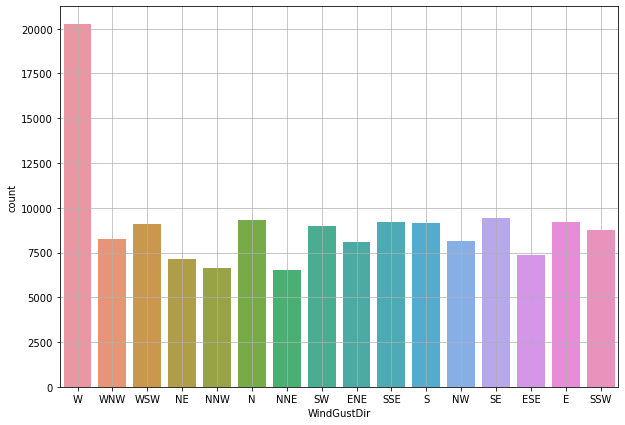

In [41]:
plt.figure(figsize=(10, 7))
sns.countplot(data=dataset, x="WindGustDir")
plt.grid(linewidth = 0.7)
plt.show()

In [42]:
# print number of labels in WindDir3pm variable

print('WindDir3pm contains', len(dataset['WindDir3pm'].unique()), 'labels')

WindDir3pm contains 17 labels


In [43]:
# check labels in WindDir3pm variable

dataset['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [44]:
dataset['WindDir3pm'].fillna(dataset['WindDir3pm'].mode()[0], inplace=True)

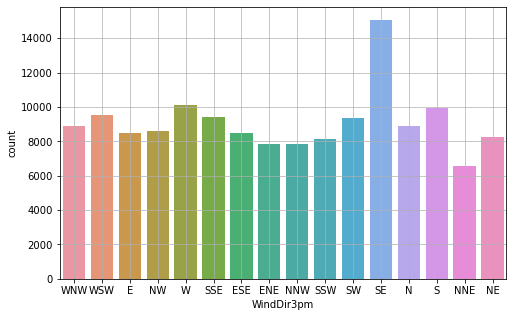

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x="WindDir3pm")
plt.grid(linewidth = 0.7)
plt.show()

In [46]:
dataset.WindDir9am.unique()

dataset.WindDir9am.value_counts()

dataset['WindDir9am'].fillna(dataset['WindDir9am'].mode()[0], inplace=True)

dataset.WindDir9am.isnull().sum()



0

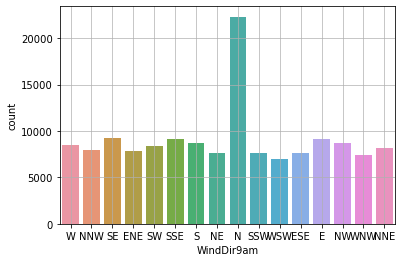

In [47]:
sns.countplot(data=dataset, x="WindDir9am")
plt.grid(linewidth = 0.7)
plt.show()

In [49]:
# print number of labels in RainToday variable

print('RainToday contains', len(dataset['RainToday'].unique()), 'labels')

RainToday contains 3 labels


In [50]:
# check labels in RainToday variable

dataset['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [51]:
dataset.RainToday.value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [52]:
dataset['RainToday'].fillna(dataset['RainToday'].mode()[0], inplace=True)

dataset.RainToday.isnull().sum()

0

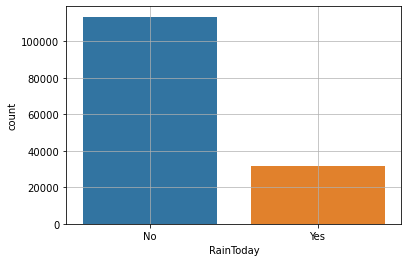

In [53]:
sns.countplot(data=dataset, x="RainToday")
plt.grid(linewidth = 0.7)
plt.show()

In [54]:
#raintomorrow

dataset.RainTomorrow.unique()

dataset.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [55]:
dataset['RainTomorrow'].fillna(dataset['RainTomorrow'].mode()[0], inplace=True)

dataset.RainTomorrow.isnull().sum()

0

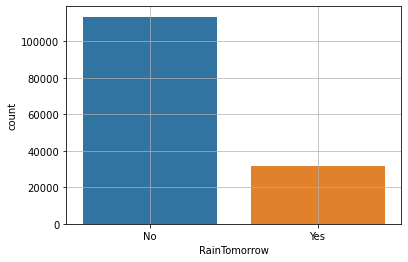

In [56]:
sns.countplot(data=dataset, x="RainTomorrow")
plt.grid(linewidth = 0.7)
plt.show()

<span style='color:Blue'> **Question - 10. Is there any missing value after the null imputation process?**</span>

In [57]:
dataset[categorical].isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

<span style='color:Blue'> **Question - 11. Determine the missing value from the numerical features.** </span>

In [58]:
dataset[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

<span style='color:Blue'> **Question - 12. How do you view outliers based on the above variables?** </span>

Text(0, 0.5, 'WindSpeed3pm')

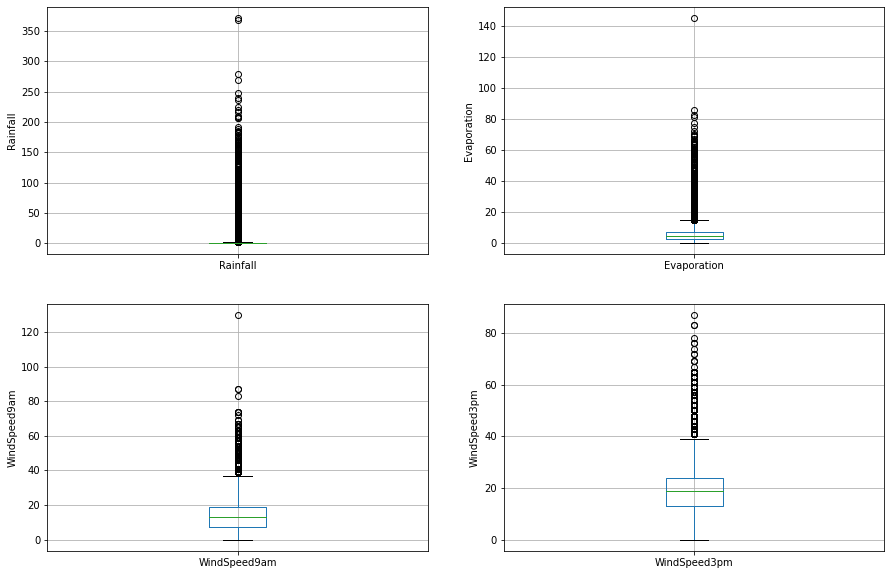

In [59]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = dataset.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = dataset.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = dataset.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = dataset.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

<span style='color:Blue'> **Question - 13. Which features are highly correlated?**</span>

NOTE:- Explain each and every feature with corrleation values.

In [60]:
# Compute the correlation matrix
corr = dataset.corr()

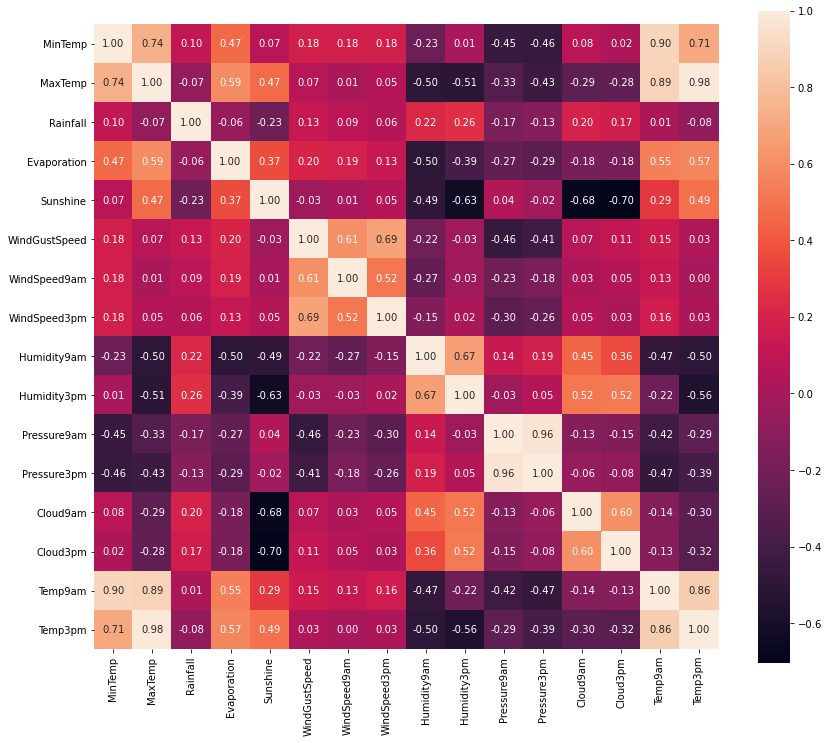

In [61]:
plt.figure(figsize=(14,12))
ax = sns.heatmap(corr, square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

1. **MinTemp and MaxTemp** features are highly correlated (correlation coefficient = 0.73).

2. **MinTemp and Temp9am** features are highly correlated (correlation coefficient = 0.90).

3. **MinTemp and Temp3pm** features are highly correlated (correlation coefficient = 0.70).

4. **MaxTemp and Temp9am** features are highly correlated (correlation coefficient = 0.88).

5. **MaxTemp and Temp3pm** features are highly correlated (correlation coefficient = 0.97).

6. **Pressure9am and Pressure3pm** features are highly correlated (correlation coefficient = 0.96).

7. **Temp9am and Temp3pm** features are highly correlated (correlation coefficient = 0.85).

<span style='color:Blue'> **Question - 14. What is the most maximum temperature that has ever been recorded?** </span>

In [62]:
print("Maximum Temperature:- "+str(dataset['MaxTemp'].max()))
dataset.groupby('Location',sort = False)['MaxTemp'].max().nlargest()

Maximum Temperature:- 48.1


Location
Woomera             48.1
Moree               47.3
Richmond            47.0
Penrith             46.9
MelbourneAirport    46.8
Name: MaxTemp, dtype: float64

<span style='color:Blue'> **Question - 15. Which location has largest amount of rainfall?** </span>

In [63]:
print("Highest Rainfall:-  "+str(dataset['Rainfall'].max()))
dataset.groupby('Location',sort = False)['Rainfall'].max().nlargest()

Highest Rainfall:-  371.0


Location
CoffsHarbour    371.0
Darwin          367.6
Cairns          278.4
Newcastle       240.0
Townsville      236.8
Name: Rainfall, dtype: float64

<span style='color:Blue'> **Question - 16. In which year maximum rainfall occured?** </span>

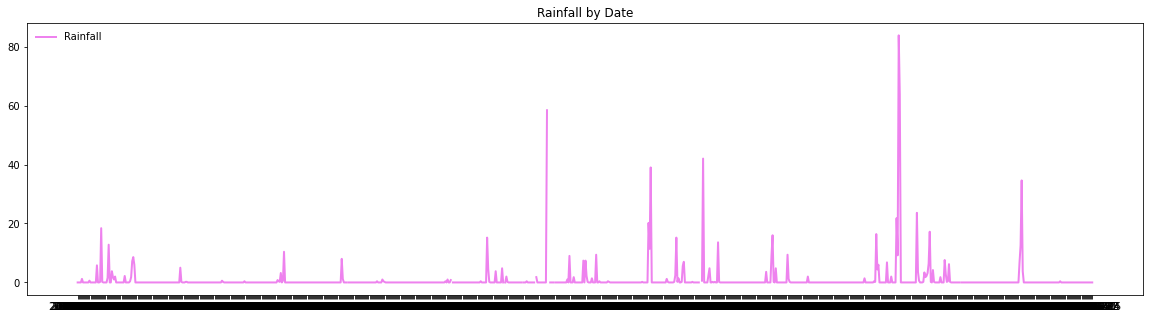

In [64]:
df_dateplot = dataset.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['Rainfall'],color='violet', linewidth=2, label= 'Rainfall')
plt.legend(loc='upper left', frameon=False)
plt.title('Rainfall by Date')
plt.show()

* The majority of rainfall occurs between December and March.

<span style='color:Blue'> **Question - 17. Machine learning algorithms need only numeric data types, Apply steps to handle categorical data.**</span>

NOTE:- Remove the Date features.

In [52]:
dataset.drop(['Date'], axis=1, inplace=True)
categorical.remove('Date')

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le =  LabelEncoder()
for i in dataset:
    if dataset[i].dtype=='object':
        dataset[i] = le.fit_transform(dataset[i])
    else:
        continue

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int32  
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    145460 non-null  int32  
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     145460 non-null  int32  
 9   WindDir3pm     145460 non-null  int32  
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

<span style='color:Blue'> **Question - 18. Are there any null value in any column? fill all missing values.**</span>

In [72]:
dataset.isnull().any()

Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir      False
WindGustSpeed     True
WindDir9am       False
WindDir3pm       False
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday        False
RainTomorrow     False
Year             False
Month            False
Day              False
dtype: bool

In [86]:
#df = dataset.fillna(lambda x: x.median())

df = dataset.fillna(dataset.mean())

In [87]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,...,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,...,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,...,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,...,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,...,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5


<span style='color:Blue'> **Question - 19. Split the dependent and independent variables for model training.** </span>

In [88]:
X = df.drop(['RainTomorrow'], axis=1).values

y = df['RainTomorrow']

In [89]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [90]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((116368, 24), (29092, 24))

In [91]:
# check the shape of y_train and y_test

y_train.shape, y_test.shape

((116368,), (29092,))

<span style='color:Blue'> **Question - 20. Convert the all features ina single data types.** </span>

NOTE:- Convert into integer.

In [92]:
cols = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow','Day','Month','Year']
for i in cols:
    df[i] = df[i].astype(int)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,...,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,...,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,...,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,...,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,...,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5


<span style='color:Blue'> **Question - 19. Load and fit the model according to the dependant variable.** </span>

In [93]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

<span style='color:Blue'> **Question - 20. Predict the outcome of the test.** </span>

In [94]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

<span style='color:Blue'> **Question - 21. Find out accuracy score on testing datset?** </span>

In [95]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8414


<span style='color:Blue'> **Question - 22. How to summarise the performance of a classifying algorithm?** </span>

In [96]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[21534  1192]
 [ 3423  2943]]

True Positives(TP) =  21534

True Negatives(TN) =  2943

False Positives(FP) =  1192

False Negatives(FN) =  3423


<span style='color:Blue'> **Question - 23.  Check the model performance on test dataset.** </span>


NOTE:- Show classification report

In [97]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22726
           1       0.71      0.46      0.56      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.70      0.73     29092
weighted avg       0.83      0.84      0.83     29092

